# Sources
https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

Hyperparameter tuning

https://satishgunjal.com/kfold/#19

Random forest using K-fold validation

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

On feature importance

https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

On Getting the best model after cross validation using gridsearchCV

https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn import linear_model, tree, ensemble
#For training without cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/Users/pw/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Specifying dataset paths
test_demographic_path = '/Users/pw/Desktop/StatisticalAnalysis/ZindiClassification/testdemographics.csv'
train_demographic_path = '/Users/pw/Desktop/StatisticalAnalysis/ZindiClassification/traindemographics.csv'
test_perf_path = '/Users/pw/Desktop/StatisticalAnalysis/ZindiClassification/testperf.csv'
train_perf_path = '/Users/pw/Desktop/StatisticalAnalysis/ZindiClassification/trainperf.csv'
test_prev_loan_path = '/Users/pw/Desktop/StatisticalAnalysis/ZindiClassification/testprevloans.csv'
train_prev_loan_path = '/Users/pw/Desktop/StatisticalAnalysis/ZindiClassification/trainprevloans.csv'

In [3]:
#Loading the datasets
test_demo_df = pd.read_csv(test_demographic_path)
train_demo_df = pd.read_csv(train_demographic_path)
test_perf_df = pd.read_csv(test_perf_path)
train_perf_df = pd.read_csv(train_perf_path)
test_prevloan_df = pd.read_csv(test_prev_loan_path)
train_prevloan_df = pd.read_csv(train_prev_loan_path)

In [4]:
datasets = ['test_demo_df','train_demo_df','test_perf_df','train_perf_df','test_prevloan_df','train_prevloan_df']

In [5]:
#Combine datasets based on customer id
new_data = pd.merge(train_demo_df, train_perf_df, on = "customerid")

In [6]:
new_data.head(5)
print("Train Demographics Shape: ", train_demo_df.shape)
print("Train Perf Shape: ", train_perf_df.shape)
print("New Data Shape: ", new_data.shape)

Train Demographics Shape:  (4346, 9)
Train Perf Shape:  (4368, 10)
New Data Shape:  (3277, 18)


In [7]:
combined_df = pd.merge(new_data,train_prevloan_df, on = "customerid")

In [8]:
print("Combined Data shape: ", combined_df.shape)
print("Train Previous Loan Shape: ", train_prevloan_df.shape)

Combined Data shape:  (13693, 29)
Train Previous Loan Shape:  (18183, 12)


In [9]:
combined_df.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
systemloanid_x                  int64
loannumber_x                    int64
approveddate_x                 object
creationdate_x                 object
loanamount_x                  float64
totaldue_x                    float64
termdays_x                      int64
referredby_x                   object
good_bad_flag                  object
systemloanid_y                  int64
loannumber_y                    int64
approveddate_y                 object
creationdate_y                 object
loanamount_y                  float64
totaldue_y                    float64
termdays_y                      int64
closeddate                     object
referredby_y

# Exploratory Data Analysis

In [10]:
combined_df.head(5)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,301964962,...,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,301972172,...,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,NaN,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,301976271,...,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,NaN,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000


In [11]:
combined_df.describe()

,longitude_gps,latitude_gps,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,systemloanid_y,loannumber_y,loanamount_y,totaldue_y,termdays_y
count,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000
mean,4.482207,7.291442,3.019801e+08,8.401081,25688.673045,29812.666494,33.233769,3.018395e+08,4.200760,16566.347769,19646.612269,26.742131
std,8.639590,3.436232,1.343531e+04,4.318780,12625.374212,13772.770273,14.440482,9.304690e+04,3.269552,9375.687619,10512.238823,10.997624
min,-118.247009,-33.868818,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,3.016001e+08,1.000000,3000.000000,3900.000000,15.000000
25%,3.354793,6.471885,3.019678e+08,5.000000,10000.000000,13000.000000,30.000000,3.017767e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.576022,6.617633,3.019787e+08,8.000000,30000.000000,33000.000000,30.000000,3.018545e+08,3.000000,10000.000000,13000.000000,30.000000
75%,6.364658,7.421333,3.019929e+08,11.000000,40000.000000,44000.000000,30.000000,3.019193e+08,6.000000,20000.000000,24500.000000,30.000000
max,151.209290,71.228069,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [12]:
combined_df.isnull().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
referredby_x                  12891
good_bad_flag                     0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                        0
referredby_y                  12891
firstduedate                

In [13]:
#dropping variables with an extremely high number of missing values
new_combine_data = combined_df.drop(columns = ['bank_branch_clients','level_of_education_clients','referredby_x','referredby_y'])

In [14]:
new_combine_data.isnull().sum()

customerid                      0
birthdate                       0
bank_account_type               0
longitude_gps                   0
latitude_gps                    0
bank_name_clients               0
employment_status_clients    1363
systemloanid_x                  0
loannumber_x                    0
approveddate_x                  0
creationdate_x                  0
loanamount_x                    0
totaldue_x                      0
termdays_x                      0
good_bad_flag                   0
systemloanid_y                  0
loannumber_y                    0
approveddate_y                  0
creationdate_y                  0
loanamount_y                    0
totaldue_y                      0
termdays_y                      0
closeddate                      0
firstduedate                    0
firstrepaiddate                 0
dtype: int64

In [15]:
new_combine_data['employment_status_clients'].value_counts()

Permanent        9138
Self-Employed    2319
Student           615
Unemployed        219
Retired            29
Contract           10
Name: employment_status_clients, dtype: int64

In [16]:
#Replacing the missing values in employment status clients with the most occuring category

def most_frequent_replace(df, colName):
    frequent_cat = df[colName].mode()[0]
    
    #Replace the nan values with the most occuring category
    df[colName+'_new'] = df[colName]
    df[colName+'_new'].fillna(frequent_cat)

In [17]:
#Call function to replace missing values
#most_frequent_replace(new_combine_data,'employment_status_clients')

In [18]:
frequent_cat = new_combine_data['employment_status_clients'].mode()[0]

In [19]:
new_combine_data['employment_status_clients_new']= new_combine_data['employment_status_clients'].fillna(frequent_cat)

In [20]:
new_combine_data.isnull().sum()

customerid                          0
birthdate                           0
bank_account_type                   0
longitude_gps                       0
latitude_gps                        0
bank_name_clients                   0
employment_status_clients        1363
systemloanid_x                      0
loannumber_x                        0
approveddate_x                      0
creationdate_x                      0
loanamount_x                        0
totaldue_x                          0
termdays_x                          0
good_bad_flag                       0
systemloanid_y                      0
loannumber_y                        0
approveddate_y                      0
creationdate_y                      0
loanamount_y                        0
totaldue_y                          0
termdays_y                          0
closeddate                          0
firstduedate                        0
firstrepaiddate                     0
employment_status_clients_new       0
dtype: int64

In [21]:
final_data = new_combine_data.drop(columns = ['employment_status_clients'])

In [22]:
final_data.describe()

,longitude_gps,latitude_gps,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,systemloanid_y,loannumber_y,loanamount_y,totaldue_y,termdays_y
count,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000
mean,4.482207,7.291442,3.019801e+08,8.401081,25688.673045,29812.666494,33.233769,3.018395e+08,4.200760,16566.347769,19646.612269,26.742131
std,8.639590,3.436232,1.343531e+04,4.318780,12625.374212,13772.770273,14.440482,9.304690e+04,3.269552,9375.687619,10512.238823,10.997624
min,-118.247009,-33.868818,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,3.016001e+08,1.000000,3000.000000,3900.000000,15.000000
25%,3.354793,6.471885,3.019678e+08,5.000000,10000.000000,13000.000000,30.000000,3.017767e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.576022,6.617633,3.019787e+08,8.000000,30000.000000,33000.000000,30.000000,3.018545e+08,3.000000,10000.000000,13000.000000,30.000000
75%,6.364658,7.421333,3.019929e+08,11.000000,40000.000000,44000.000000,30.000000,3.019193e+08,6.000000,20000.000000,24500.000000,30.000000
max,151.209290,71.228069,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [23]:
#Exploratory Data Analysis
#Using box-plots for continous data
# Using box plots to spot outliers / anomalies
def box_plot(df, colName):
    fig,ax = plt.subplots(figsize=(10,7))
    
    ax.grid(color='grey', axis='y', linestyle='-',
            linewidth=0.25, alpha=0.5)
    
    ax.set_title(colName)
    
    plt.boxplot(df[colName])
    
    plt.show()

In [24]:
int_columns = ['systemloanid_x','loannumber_x','termdays_x','systemloanid_y','loannumber_y','termdays_y']

float_columns =['longitude_gps','latitude_gps','loanamount_x','totaldue_x','loanamount_y','totaldue_y']



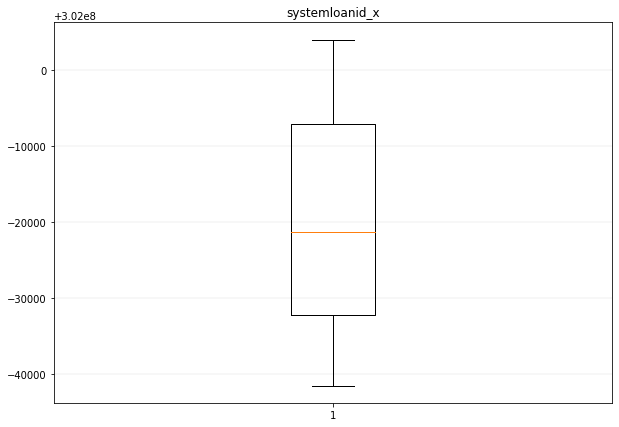

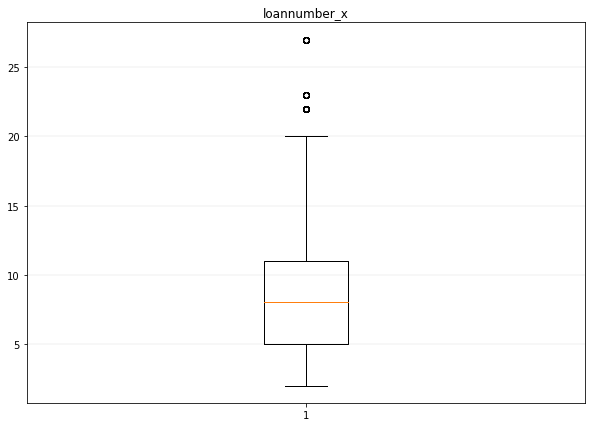

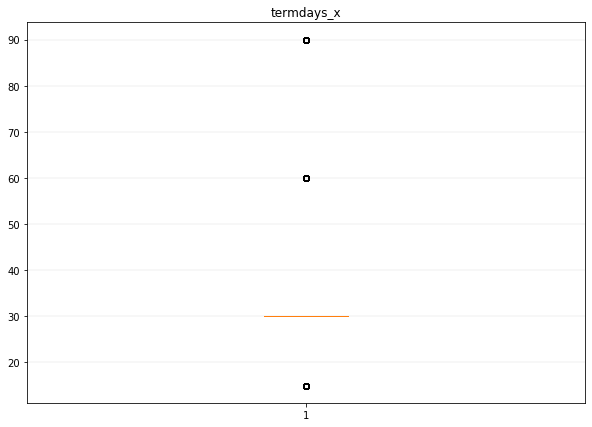

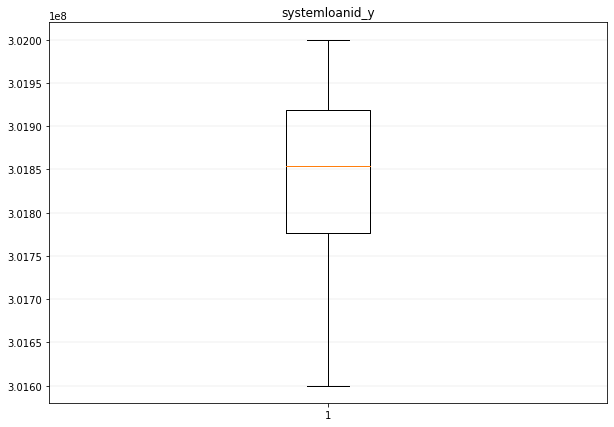

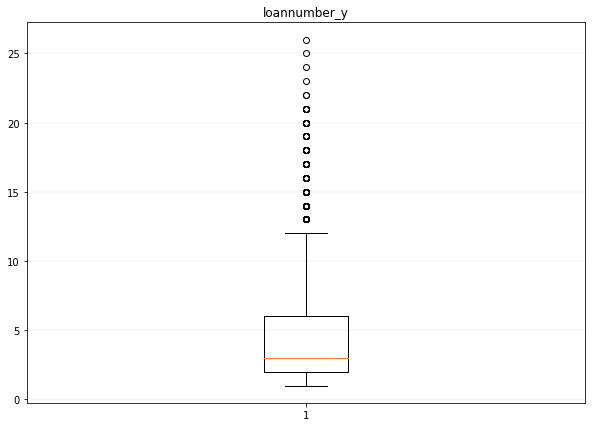

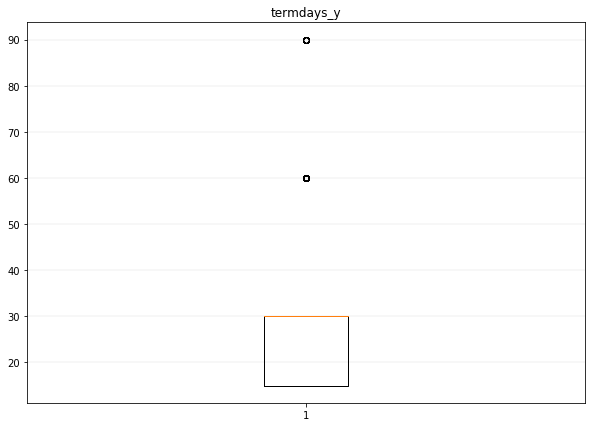

In [25]:
for column in int_columns:
    box_plot(final_data,column)

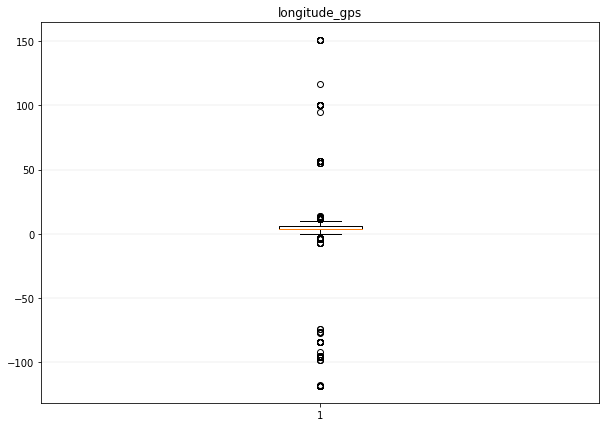

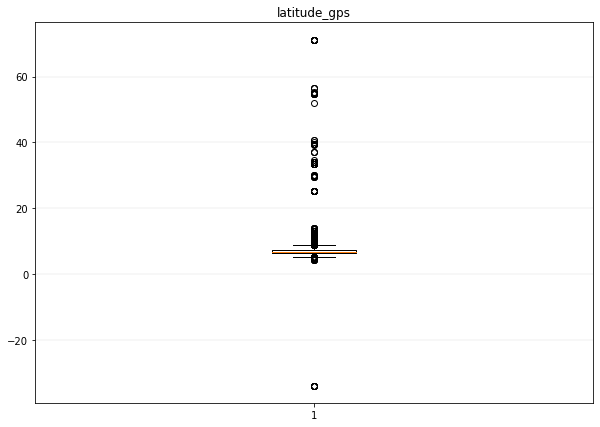

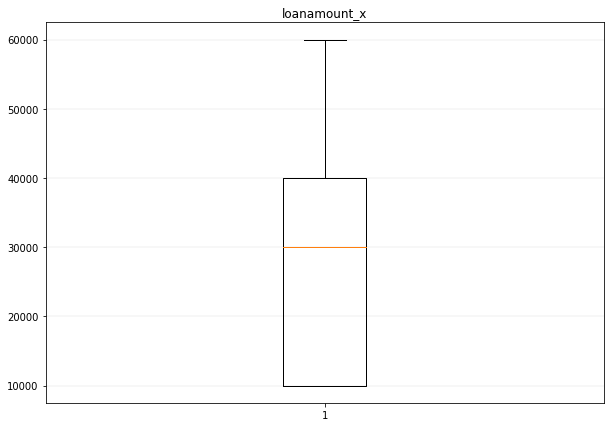

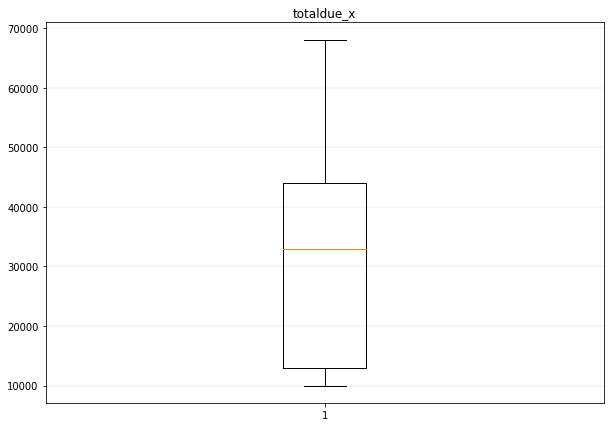

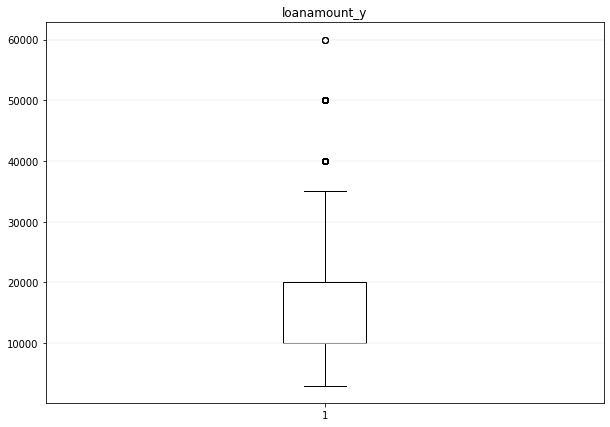

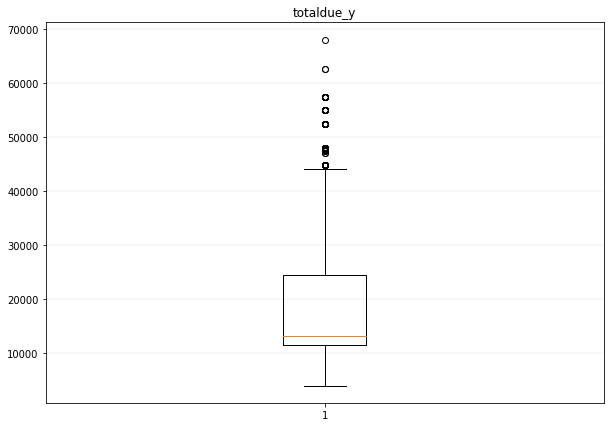

In [26]:
for column in float_columns:
    box_plot(final_data,column)

In [27]:
#Visualization of categorical variables
def box_plot(dataframe, colName):
    
    fig, ax = plt.subplots(figsize=(6,4))

    #Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-',
        linewidth=0.25, alpha=0.5)
    ax.set_title(colName)
    ax.hist(dataframe[colName], color = "green")
    plt.show()

In [28]:
cat_columns = ['bank_account_type','bank_name_clients','good_bad_flag','employment_status_clients_new']

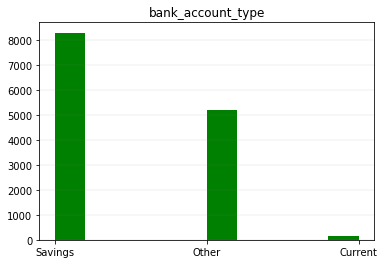

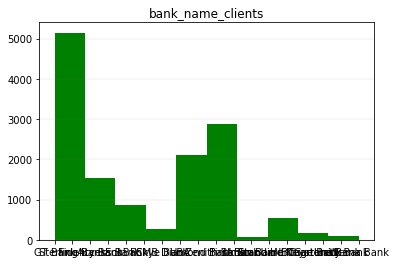

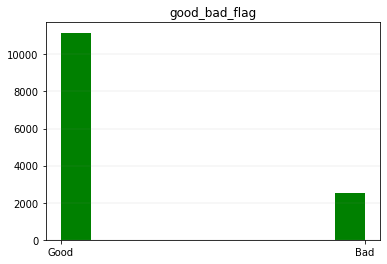

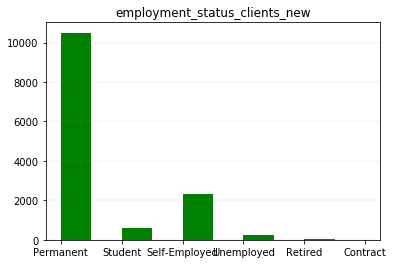

In [29]:
for column in cat_columns:
    box_plot(final_data,column)

In [30]:
final_data['good_bad_flag'].value_counts()

Good    11165
Bad      2528
Name: good_bad_flag, dtype: int64

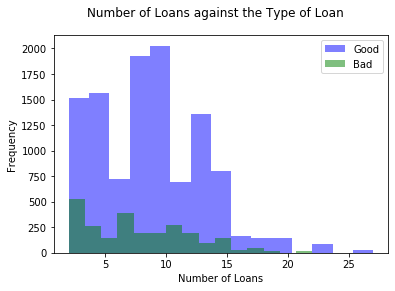

In [31]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['loannumber_x'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['loannumber_x'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Number of Loans")
ax.set_ylabel("Frequency")

fig.suptitle("Number of Loans against the Type of Loan")

ax.legend();

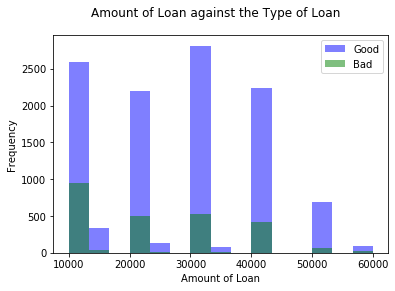

In [32]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['loanamount_x'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['loanamount_x'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Amount of Loan")
ax.set_ylabel("Frequency")

fig.suptitle("Amount of Loan against the Type of Loan")

ax.legend();

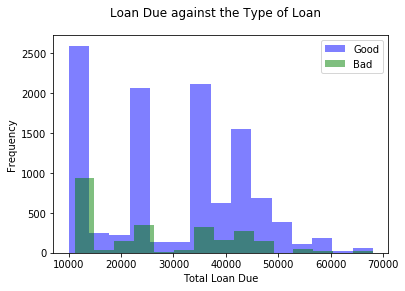

In [33]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['totaldue_x'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['totaldue_x'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Total Loan Due")
ax.set_ylabel("Frequency")

fig.suptitle("Loan Due against the Type of Loan")

ax.legend();

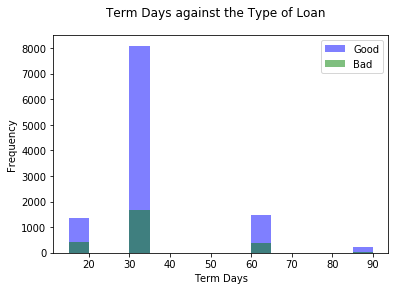

In [34]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['termdays_x'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['termdays_x'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Term Days")
ax.set_ylabel("Frequency")

fig.suptitle("Term Days against the Type of Loan")

ax.legend();

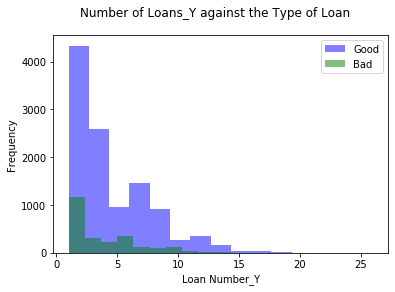

In [35]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['loannumber_y'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['loannumber_y'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Loan Number_Y")
ax.set_ylabel("Frequency")

fig.suptitle("Number of Loans_Y against the Type of Loan")

ax.legend();

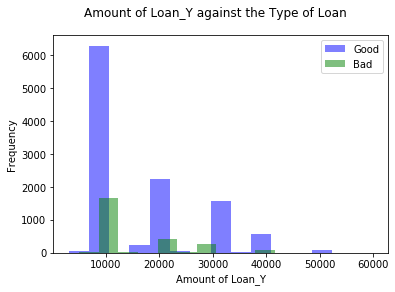

In [36]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['loanamount_y'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['loanamount_y'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Amount of Loan_Y")
ax.set_ylabel("Frequency")

fig.suptitle("Amount of Loan_Y against the Type of Loan")

ax.legend();

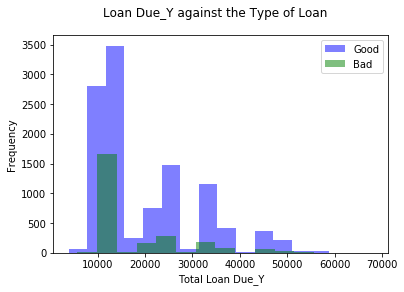

In [37]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['totaldue_y'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['totaldue_y'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Total Loan Due_Y")
ax.set_ylabel("Frequency")

fig.suptitle("Loan Due_Y against the Type of Loan")

ax.legend();

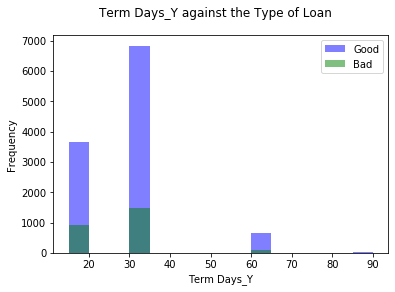

In [38]:
fig, ax = plt.subplots()

ax.hist(final_data[final_data['good_bad_flag']=='Good']['termdays_y'], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(final_data[final_data['good_bad_flag']=='Bad']['termdays_y'], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Term Days_Y")
ax.set_ylabel("Frequency")

fig.suptitle("Term Days_Y against the Type of Loan")

ax.legend();

# Feature Engineering

In [39]:
#Creatine numeric values for the target variable (1 for Good and 2 for Bad)

final_data['good_bad_flag'] = final_data['good_bad_flag'].replace(['Good','Bad'],[1,0])

In [40]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerid                     13693 non-null  object 
 1   birthdate                      13693 non-null  object 
 2   bank_account_type              13693 non-null  object 
 3   longitude_gps                  13693 non-null  float64
 4   latitude_gps                   13693 non-null  float64
 5   bank_name_clients              13693 non-null  object 
 6   systemloanid_x                 13693 non-null  int64  
 7   loannumber_x                   13693 non-null  int64  
 8   approveddate_x                 13693 non-null  object 
 9   creationdate_x                 13693 non-null  object 
 10  loanamount_x                   13693 non-null  float64
 11  totaldue_x                     13693 non-null  float64
 12  termdays_x                     13693 non-null 

In [41]:
#Categorical Variables and their unique types
cat_variables = ['bank_account_type','bank_name_clients','employment_status_clients_new']

In [42]:
for variable in cat_variables:
    print(final_data[variable].value_counts())
    print('________________')

Savings    8311
Other      5228
Current     154
Name: bank_account_type, dtype: int64
________________
GT Bank               5034
First Bank            1932
Access Bank           1270
UBA                   1126
Diamond Bank           983
Zenith Bank            948
Stanbic IBTC           489
EcoBank                450
FCMB                   420
Skye Bank              272
Fidelity Bank          267
Sterling Bank          112
Wema Bank               88
Heritage Bank           87
Keystone Bank           83
Union Bank              74
Standard Chartered      44
Unity Bank              14
Name: bank_name_clients, dtype: int64
________________
Permanent        10501
Self-Employed     2319
Student            615
Unemployed         219
Retired             29
Contract            10
Name: employment_status_clients_new, dtype: int64
________________


In [43]:
final_data.head(5)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate,employment_status_clients_new
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,...,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000,Permanent
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,...,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000,Permanent
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,...,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000,Permanent
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,...,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000,Permanent
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,...,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000,Permanent


In [44]:
#Drop irrelevant variables from the dataset
final_data = final_data.drop(columns = ['customerid','systemloanid_x','approveddate_x','creationdate_x','systemloanid_y','approveddate_y','creationdate_y'])

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   birthdate                      13693 non-null  object 
 1   bank_account_type              13693 non-null  object 
 2   longitude_gps                  13693 non-null  float64
 3   latitude_gps                   13693 non-null  float64
 4   bank_name_clients              13693 non-null  object 
 5   loannumber_x                   13693 non-null  int64  
 6   loanamount_x                   13693 non-null  float64
 7   totaldue_x                     13693 non-null  float64
 8   termdays_x                     13693 non-null  int64  
 9   good_bad_flag                  13693 non-null  int64  
 10  loannumber_y                   13693 non-null  int64  
 11  loanamount_y                   13693 non-null  float64
 12  totaldue_y                     13693 non-null 

# Dealing with Date Objects
https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587
https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer

In [46]:
#Changing the date columns from strings to date format
datetpye_col = ['birthdate','closeddate','firstduedate','firstrepaiddate']

In [47]:
def string_to_date(dataFrame, colName):
    dataFrame[colName] = pd.to_datetime(dataFrame[colName])

In [48]:
#Calling the string to datetime conversion function
for column in datetpye_col:
    string_to_date(final_data, column)

In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   birthdate                      13693 non-null  datetime64[ns]
 1   bank_account_type              13693 non-null  object        
 2   longitude_gps                  13693 non-null  float64       
 3   latitude_gps                   13693 non-null  float64       
 4   bank_name_clients              13693 non-null  object        
 5   loannumber_x                   13693 non-null  int64         
 6   loanamount_x                   13693 non-null  float64       
 7   totaldue_x                     13693 non-null  float64       
 8   termdays_x                     13693 non-null  int64         
 9   good_bad_flag                  13693 non-null  int64         
 10  loannumber_y                   13693 non-null  int64         
 11  loanamount_y   

In [50]:
#Create age from the birth date
today = pd.to_datetime('today')
final_data['age'] = today.year - final_data['birthdate'].dt.year

In [51]:
#Drop the birthdate column
final_data = final_data.drop(columns = ['birthdate'])

In [52]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   bank_account_type              13693 non-null  object        
 1   longitude_gps                  13693 non-null  float64       
 2   latitude_gps                   13693 non-null  float64       
 3   bank_name_clients              13693 non-null  object        
 4   loannumber_x                   13693 non-null  int64         
 5   loanamount_x                   13693 non-null  float64       
 6   totaldue_x                     13693 non-null  float64       
 7   termdays_x                     13693 non-null  int64         
 8   good_bad_flag                  13693 non-null  int64         
 9   loannumber_y                   13693 non-null  int64         
 10  loanamount_y                   13693 non-null  float64       
 11  totaldue_y     

In [53]:
#Create a variable that calculates late or early payment based on
#firstduedate and firstrepaid date
final_data['pay_commit'] = (final_data['firstduedate']-final_data['firstrepaiddate']).dt.days

In [54]:
final_data['longitude_gps'].head(-5)

0        3.319219
1        3.325598
2        5.746100
3        5.746100
4        5.746100
           ...   
13683    7.046360
13684    7.046360
13685    7.046360
13686    3.236753
13687    3.236753
Name: longitude_gps, Length: 13688, dtype: float64

In [55]:
#Create a variable that calculates the repayment period based on
#First due date and Closed Date
final_data['repay_period'] = (final_data['firstduedate']-final_data['closeddate']).dt.days

In [56]:
#Drop the three date objects
final_data = final_data.drop(columns =['closeddate','firstduedate','firstrepaiddate'])

In [57]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bank_account_type              13693 non-null  object 
 1   longitude_gps                  13693 non-null  float64
 2   latitude_gps                   13693 non-null  float64
 3   bank_name_clients              13693 non-null  object 
 4   loannumber_x                   13693 non-null  int64  
 5   loanamount_x                   13693 non-null  float64
 6   totaldue_x                     13693 non-null  float64
 7   termdays_x                     13693 non-null  int64  
 8   good_bad_flag                  13693 non-null  int64  
 9   loannumber_y                   13693 non-null  int64  
 10  loanamount_y                   13693 non-null  float64
 11  totaldue_y                     13693 non-null  float64
 12  termdays_y                     13693 non-null 

# Dealing with location data
https://www.kdnuggets.com/2018/12/feature-building-techniques-tricks-kaggle.html

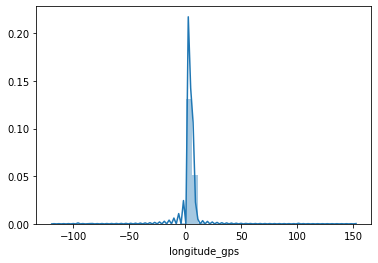

<Figure size 432x288 with 0 Axes>

In [58]:
#Since the longitude and latitude data had extreme outliers, we log-transform them 
sns.distplot(final_data['longitude_gps'])
fig = plt.figure()

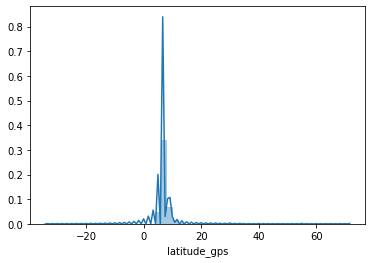

<Figure size 432x288 with 0 Axes>

In [59]:
sns.distplot(final_data['latitude_gps'])
fig = plt.figure()

In [60]:
#Log trasform the longitute and latitude
final_data['longitude_gps'] = np.log(final_data['longitude_gps'])
final_data['latitude_gps'] = np.log(final_data['latitude_gps'])

/Users/pw/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
final_data.isnull().sum()

bank_account_type                  0
longitude_gps                    100
latitude_gps                       7
bank_name_clients                  0
loannumber_x                       0
loanamount_x                       0
totaldue_x                         0
termdays_x                         0
good_bad_flag                      0
loannumber_y                       0
loanamount_y                       0
totaldue_y                         0
termdays_y                         0
employment_status_clients_new      0
age                                0
pay_commit                         0
repay_period                       0
dtype: int64

In [62]:
final_data['longitude_gps'].fillna(final_data['longitude_gps'].mean(), inplace = True)
final_data['latitude_gps'].fillna(final_data['latitude_gps'].mean(), inplace = True)

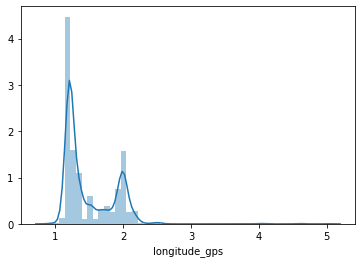

<Figure size 432x288 with 0 Axes>

In [63]:
sns.distplot(final_data['longitude_gps'])
fig = plt.figure()

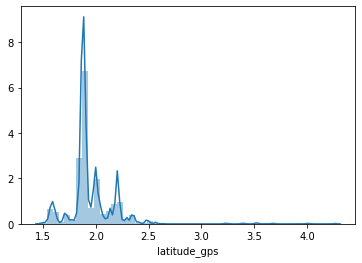

<Figure size 432x288 with 0 Axes>

In [64]:
sns.distplot(final_data['latitude_gps'])
fig = plt.figure()

# Label Encoding

In [65]:
cat_columns = ['bank_account_type','bank_name_clients','employment_status_clients_new']

In [66]:
#We define two functions that will help create dummy variables 
def create_dummy(dataframe, cat_vars):
    
    for var in cat_vars:
        cat_list = 'var'+'_'+'var'
        cat_list = pd.get_dummies(dataframe[var], prefix=var)
        dataframe_new = dataframe.join(cat_list)
        dataframe = dataframe_new
    data_vars = dataframe.columns.values.tolist()
    to_keep = [i for i in data_vars if i not in cat_vars]
    
    dataframe_final = dataframe[to_keep]
    
    return dataframe_final

In [67]:
data_to_model = create_dummy(final_data, cat_columns)

In [68]:
data_to_model.head(5)

,longitude_gps,latitude_gps,loannumber_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,loannumber_y,loanamount_y,totaldue_y,...,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_new_Contract,employment_status_clients_new_Permanent,employment_status_clients_new_Retired,employment_status_clients_new_Self-Employed,employment_status_clients_new_Student,employment_status_clients_new_Unemployed
0,1.199730,1.876193,2,10000.0,13000.0,30,1,1,10000.0,11500.0,...,0,0,0,0,0,1,0,0,0,0
1,1.201650,1.962824,2,10000.0,13000.0,30,0,1,10000.0,13000.0,...,0,0,0,0,0,1,0,0,0,0
2,1.748521,1.716169,4,10000.0,13000.0,30,1,3,10000.0,13000.0,...,0,0,0,0,0,1,0,0,0,0
3,1.748521,1.716169,4,10000.0,13000.0,30,1,1,10000.0,11500.0,...,0,0,0,0,0,1,0,0,0,0
4,1.748521,1.716169,4,10000.0,13000.0,30,1,2,10000.0,11500.0,...,0,0,0,0,0,1,0,0,0,0


# Modelling

In [69]:
#Creating features and targets and converting the data to arrays
#Labels that we want to predict
labels = np.array(data_to_model['good_bad_flag'])
#Create the features by dropping the label
features = data_to_model.drop('good_bad_flag', axis=1)

#Save feature names for later use
feature_list = list(features.columns)

#Convert to numpy arrays
features = np.array(features)

In [70]:
#Splitting the data into a train and validation set
#Model Score using KFold
#The folds are made by preserving the percentages of samples for each class
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

count = 1
#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in kf.split(features,labels):
    print(f'Fold:{count}, Train set: {len(train_index)},Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 10954,Test set:2739
Fold:2, Train set: 10954,Test set:2739
Fold:3, Train set: 10954,Test set:2739
Fold:4, Train set: 10955,Test set:2738
Fold:5, Train set: 10955,Test set:2738


# Random Forest

In [71]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), 
                        features, labels, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


Scores for each fold are: [0.92332968 0.91967871 0.91493246 0.9247626  0.92184076]
Average score: 0.92


# Logistic Regression

In [72]:
score = cross_val_score(linear_model.LogisticRegression(random_state= 42), 
                        features, labels, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


Scores for each fold are: [0.81489595 0.81599124 0.81489595 0.81446311 0.81665449]
Average score: 0.82


# Decision Tree Classifier

In [73]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), 
                        features, labels, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


Scores for each fold are: [0.91858342 0.88645491 0.9098211  0.90138787 0.91563185]
Average score: 0.91


# Without Cross Validation

In [74]:
#Creating the train and test sets using scikit-learn
train_features, test_features, train_labels, test_labels = train_test_split(
features,labels, test_size = 0.2, random_state = 42)

In [75]:
#Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model using the training data
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [76]:
#Prediction
test_prediction = rf.predict(test_features)

In [77]:
score = rf.score(train_features, train_labels)

In [78]:
print('Score: ', round((score*100), 2),'%')

Score:  100.0 %


# Feature Importance

In [79]:
#Get numerical feature importances
importances = list(rf.feature_importances_)

#List of tupples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature,
                      importance in zip(feature_list, importances)]


#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                            reverse = True)


#Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: longitude_gps        Importance: 0.15
Variable: latitude_gps         Importance: 0.15
Variable: age                  Importance: 0.11
Variable: loannumber_x         Importance: 0.08
Variable: pay_commit           Importance: 0.07
Variable: repay_period         Importance: 0.07
Variable: totaldue_x           Importance: 0.05
Variable: loanamount_x         Importance: 0.03
Variable: loannumber_y         Importance: 0.03
Variable: totaldue_y           Importance: 0.03
Variable: termdays_x           Importance: 0.02
Variable: bank_name_clients_GT Bank Importance: 0.02
Variable: loanamount_y         Importance: 0.01
Variable: termdays_y           Importance: 0.01
Variable: bank_account_type_Other Importance: 0.01
Variable: bank_account_type_Savings Importance: 0.01
Variable: bank_name_clients_Access Bank Importance: 0.01
Variable: bank_name_clients_Diamond Bank Importance: 0.01
Variable: bank_name_clients_EcoBank Importance: 0.01
Variable: bank_name_clients_FCMB Importance: 0.01
V

# Drop variables and rerun cross validation and the classifiers

In [80]:
new_data = data_to_model.drop(columns = ['bank_account_type_Current','bank_name_clients_Heritage Bank',
                                         'bank_name_clients_Keystone Bank','bank_name_clients_Stanbic IBTC',
                                        'bank_name_clients_Standard Chartered','bank_name_clients_Sterling Bank',
                                        'bank_name_clients_Union Bank','bank_name_clients_Unity Bank',
                                         'bank_name_clients_Wema Bank','employment_status_clients_new_Contract',
                                        'employment_status_clients_new_Retired','employment_status_clients_new_Unemployed'] )

In [81]:
#Creating features and targets and converting the data to arrays
#Labels that we want to predict
labels_n = np.array(new_data['good_bad_flag'])
#Create the features by dropping the label
features_n = new_data.drop('good_bad_flag', axis=1)

#Save feature names for later use
feature_list_n = list(features_n.columns)

#Convert to numpy arrays
features_n = np.array(features_n)

In [82]:
#Splitting the data into a train and validation set
#Model Score using KFold
#The folds are made by preserving the percentages of samples for each class
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

count = 1
#we use split method that will generate indices to split data into train and test sets

for train_index, test_index in kf.split(features_n,labels_n):
    print(f'Fold:{count}, Train set: {len(train_index)},Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 10954,Test set:2739
Fold:2, Train set: 10954,Test set:2739
Fold:3, Train set: 10954,Test set:2739
Fold:4, Train set: 10955,Test set:2738
Fold:5, Train set: 10955,Test set:2738


In [83]:
#Random Forest After Removing Redundant variables
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), 
                        features_n, labels_n, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.3f}".format(score.mean())}')

Scores for each fold are: [0.9211391  0.91858342 0.92040891 0.92658875 0.9284149 ]
Average score: 0.923


In [84]:
#Creating the train and test sets of the new data set using scikit-learn
train_features_n, test_features_n, train_labels_n, test_labels_n = train_test_split(
features_n,labels_n, test_size = 0.2, random_state = 42)

In [ ]:
#Getting the best model
model = RandomForestClassifier(random_state=1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kf, refit=True)
result = search.fit(train_features_n, train_labels_n)

In [ ]:
best_model = result.best_estimator_

In [ ]:
#Evaluate the model on the hold out dataset
yhat = best_model.predict(test_features_n)

In [ ]:
yhat

In [ ]:
#Evaluate model score
acc = accuracy_score(test_labels_n,yhat)

In [ ]:
print('Best Model Accuracy: ', acc)

# Predicting the actual test data set

In [ ]:
#Combine datasets based on customer id
test_pre_data = pd.merge(test_demo_df, test_perf_df, on = "customerid")

In [ ]:
#Checking the pre-test data set shape
print("Test Demographics Shape: ", test_demo_df.shape)
print("Test Perf Shape: ", test_perf_df.shape)
print("Pre test data shape: ", test_pre_data.shape)

In [ ]:
combined_test_data = pd.merge(test_pre_data,test_prevloan_df, on = "customerid")

In [ ]:
print("Pre test data shape: ", test_pre_data.shape)
print("Combined test data shape: ", combined_test_data.shape)

In [ ]:
#Replacing missing balues
test_frequent_cat = combined_test_data['employment_status_clients'].mode()[0]

In [ ]:
combined_test_data['employment_status_clients_new']= combined_test_data['employment_status_clients'].fillna(test_frequent_cat)

In [ ]:
bank_mode = combined_test_data['bank_branch_clients'].mode()[0]
combined_test_data['bank_branch_clients'] = combined_test_data['bank_branch_clients'].fillna(bank_mode)

In [ ]:
employment_mode = combined_test_data['employment_status_clients'].mode()[0]
combined_test_data['employment_status_clients'] = combined_test_data['employment_status_clients'].fillna(employment_mode)

In [ ]:
education_mode = combined_test_data['level_of_education_clients'].mode()[0]
combined_test_data['level_of_education_clients'] = combined_test_data['level_of_education_clients'].fillna(education_mode)

In [ ]:
#Dropping variables that had extreme number of missing values in the train data
final_test_data = combined_test_data.drop(columns = ['bank_branch_clients','level_of_education_clients','referredby_x','referredby_y','employment_status_clients'])

In [ ]:
#Drop irrelevant variables from the dataset
final_test_data = final_test_data.drop(columns = ['customerid','systemloanid_x','approveddate_x','creationdate_x','systemloanid_y','approveddate_y','creationdate_y'])

Dealing with dates 

In [ ]:
#Changing the date columns from strings to date format
date_columns = ['birthdate','closeddate','firstduedate','firstrepaiddate']

In [ ]:
#Calling the string to datetime conversion function
for column in date_columns:
    string_to_date(final_test_data, column)

In [ ]:
#Create age from the birth date
today = pd.to_datetime('today')
final_test_data['age'] = today.year - final_test_data['birthdate'].dt.year

In [ ]:
final_test_data = final_test_data.drop(columns = 'birthdate')

In [ ]:
#Create a variable that calculates late or early payment based on
#firstduedate and firstrepaid date
final_test_data['pay_commit'] = (final_test_data['firstduedate']-final_test_data['firstrepaiddate']).dt.days

In [ ]:
#Create a variable that calculates the repayment period based on
#First due date and Closed Date
final_test_data['repay_period'] = (final_test_data['firstduedate']-final_test_data['closeddate']).dt.days

In [ ]:
#Drop the three date objects
final_test_data = final_test_data.drop(columns =['closeddate','firstduedate','firstrepaiddate'])

Dealing with location data

In [ ]:
#Log trasform the longitute and latitude
final_test_data['longitude_gps'] = np.log(final_test_data['longitude_gps'])
final_test_data['latitude_gps'] = np.log(final_test_data['latitude_gps'])

In [ ]:
#Missing data 
final_test_data['longitude_gps'].fillna(final_test_data['longitude_gps'].mean(), inplace = True)
final_test_data['latitude_gps'].fillna(final_test_data['latitude_gps'].mean(), inplace = True)

In [ ]:
test_cat_columns = ['bank_account_type','bank_name_clients','employment_status_clients_new']

In [ ]:
data_to_predict = create_dummy(final_test_data, test_cat_columns)

In [ ]:
final_predict_data = data_to_predict.drop(columns = ['bank_account_type_Current','bank_name_clients_Heritage Bank',
                                                     'bank_name_clients_Stanbic IBTC',
                                        'bank_name_clients_Sterling Bank',
                                        'bank_name_clients_Union Bank','bank_name_clients_Unity Bank',
                                         'bank_name_clients_Wema Bank',
                                        'employment_status_clients_new_Retired','employment_status_clients_new_Unemployed'] )

In [ ]:
#Convert data to array for predicting

test_array = np.array(final_predict_data)

In [ ]:
#Predicted Credit score
predicted_values = best_model.predict(test_array)

In [ ]:
predicted_values

In [ ]:
predicted_df = pd.DataFrame(predicted_values, columns=['Good_bad_flag'])

In [ ]:
predicted_df['Good_bad_flag'].value_counts()

In [ ]:
combined_test_data.shape

In [ ]:
col = ['customerid']
customer_id_df = combined_test_data[col]

In [ ]:
customer_id_df.head(5)

In [ ]:
predicted_df_final = pd.concat([customer_id_df,predicted_df], axis = 1)

In [ ]:
predicted_df_final.head(5)

In [ ]:
#Export the dataframe of predicted values to a csv file
predicted_df_final.to_csv(r'/Users/pw/Desktop/StatisticalAnalysis/predicted.csv', index=None, header=True)